Importing Dataset

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('netflix_titles.csv')

In [4]:
# Display the first few rows of the dataset
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


Cleaning the Dataset

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
# Drop rows with missing 'title' or 'type'
data.dropna(subset=['title', 'type'], inplace=True)

In [9]:
# Fill missing values in 'director' and 'cast' with 'Unknown'
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)

In [10]:
# For 'country', 'date_added', 'rating', we can fill with 'Unknown'
data['country'].fillna('Unknown', inplace=True)
data['date_added'].fillna('Unknown', inplace=True)
data['rating'].fillna('Unknown', inplace=True)

In [11]:
# Drop rows with missing 'duration'
data.dropna(subset=['duration'], inplace=True)

In [12]:
# Display the cleaned data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      8804 non-null   object
 4   cast          8804 non-null   object
 5   country       8804 non-null   object
 6   date_added    8804 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8804 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3   

Exploratory Data Analysis

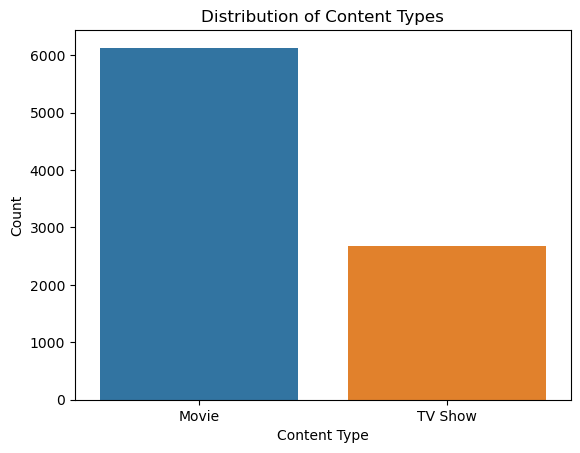

In [14]:
# Plot the distribution of content types
sns.countplot(x='type', data=data)
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

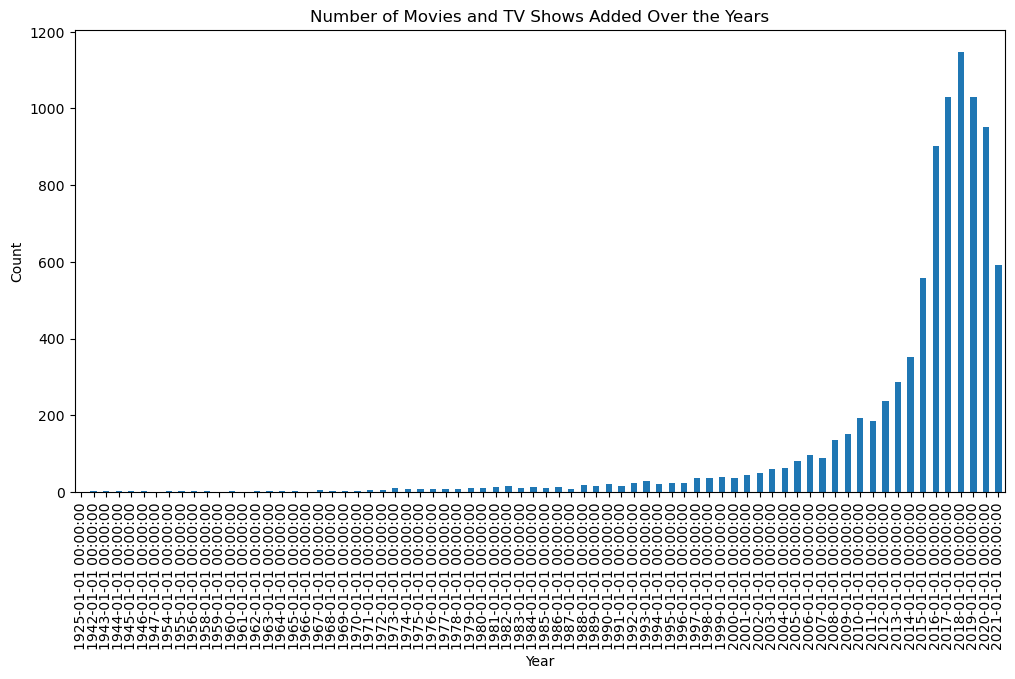

In [15]:
# Plot the number of movies and TV shows added over the years
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y')
content_by_year = data['release_year'].value_counts().sort_index()
content_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Movies and TV Shows Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

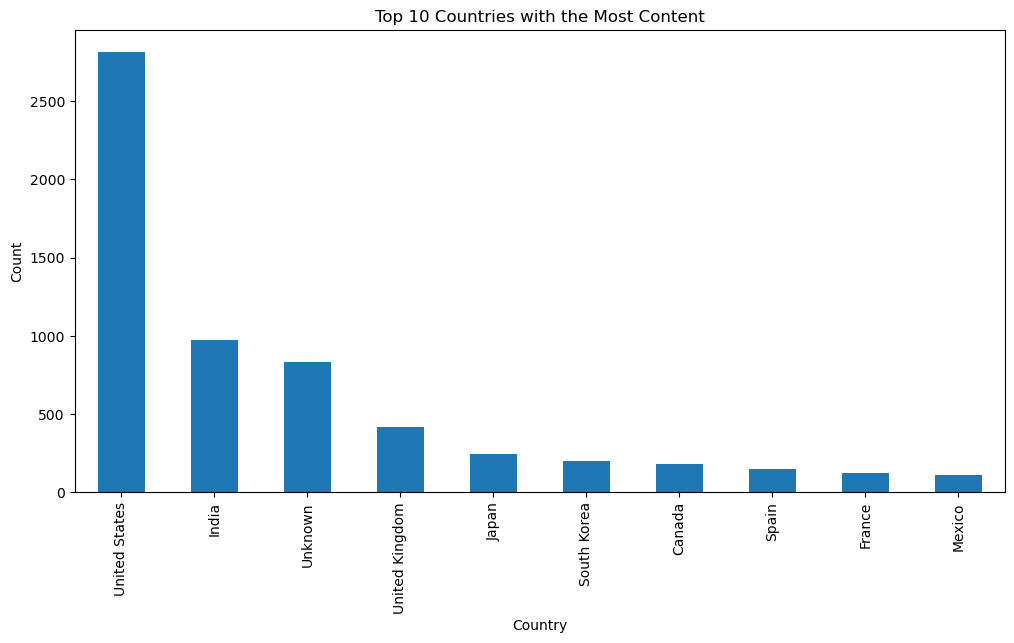

In [16]:
# Plot the top 10 countries with the most content
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Countries with the Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [17]:
# Display a word cloud of genres
from wordcloud import WordCloud

In [18]:
genres = ' '.join(data['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)

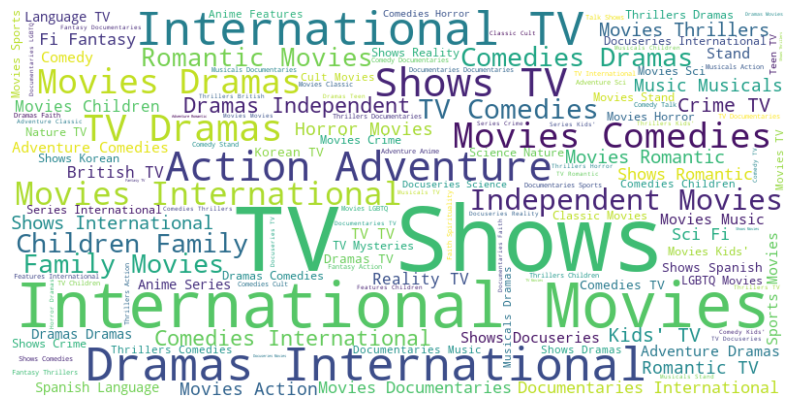

In [19]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/var/folders/k9/86f4cq750kg2ml726zhg1twh0000gn/T/ipykernel_89493/1014618994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['duration'] = movie_data['duration'].str.replace(' min', '').astype(int)
/Users/mihirpandya/Documents/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


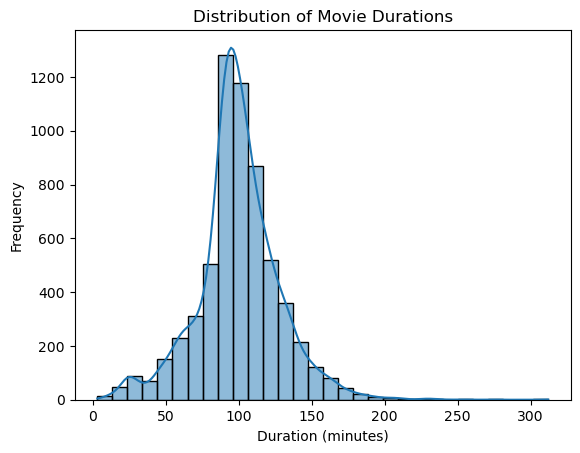

In [20]:
# Plot the distribution of movie durations
movie_data = data[data['type'] == 'Movie']
movie_data['duration'] = movie_data['duration'].str.replace(' min', '').astype(int)
sns.histplot(movie_data['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

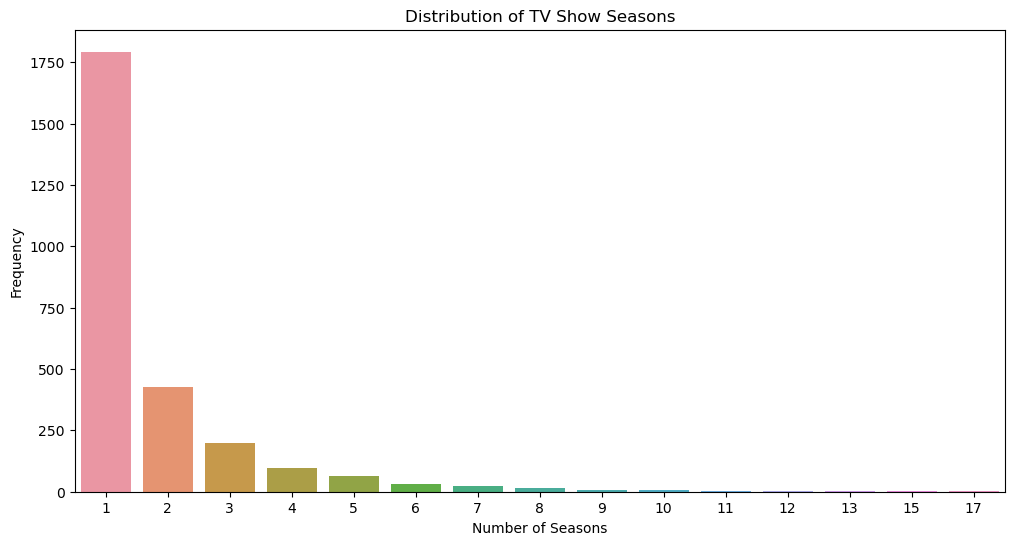

In [43]:
# Ensure the 'duration' column in TV Show data is cleaned and converted to numeric
tv_show_data = data[data['type'] == 'TV Show'].copy()  # Make a copy to avoid SettingWithCopyWarning
tv_show_data['duration'] = tv_show_data['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

# Plot the distribution of TV show seasons
plt.figure(figsize=(12, 6))
sns.countplot(x='duration', data=tv_show_data)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()


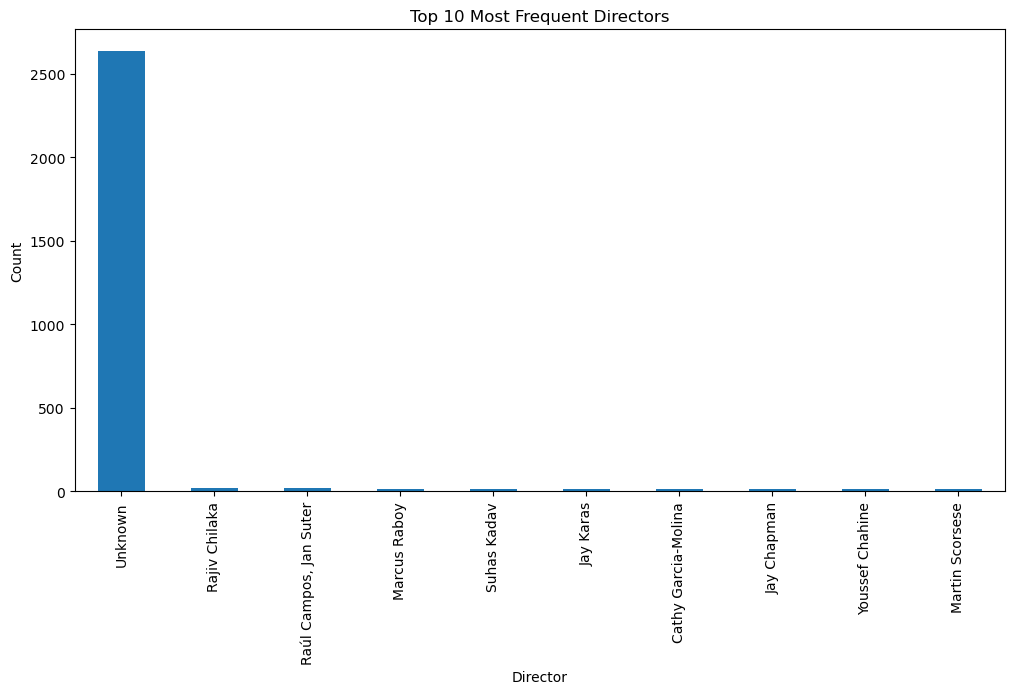

In [45]:
# Plot the top 10 most frequent directors
top_directors = data['director'].value_counts().head(10)
top_directors.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

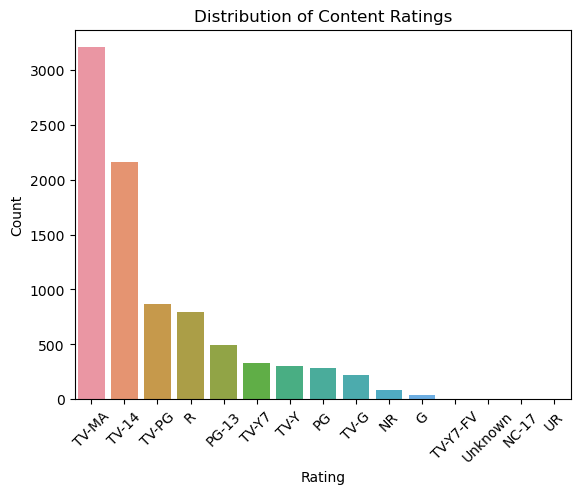

In [47]:
# Plot the distribution of content ratings
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

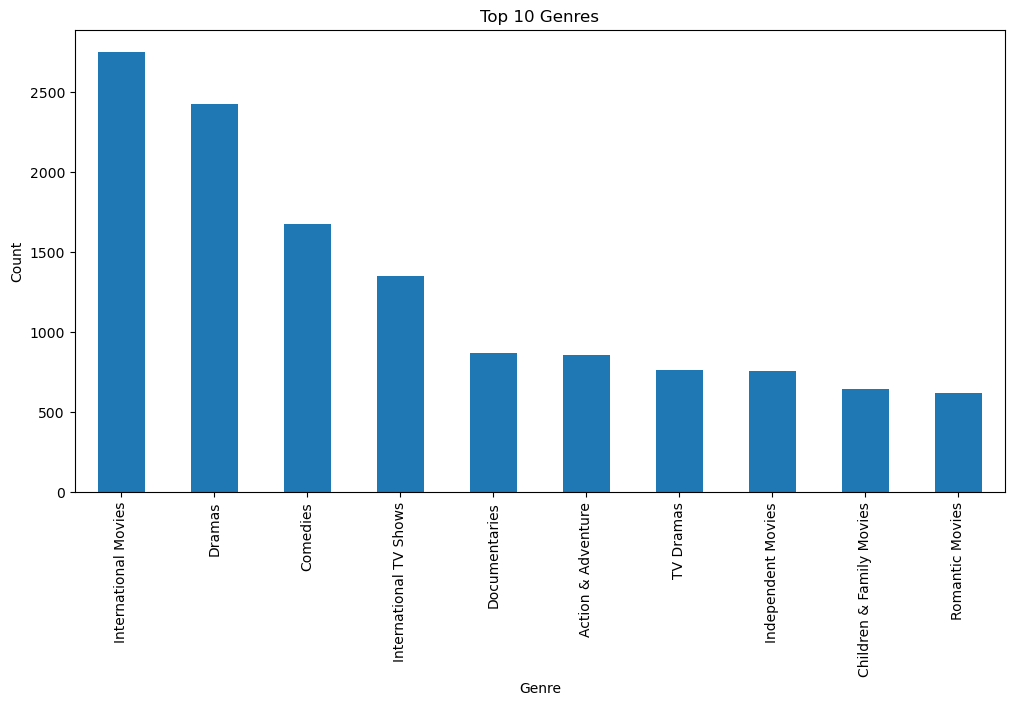

In [51]:
# Plot the top 10 genres
all_genres = data['listed_in'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)
top_genres.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

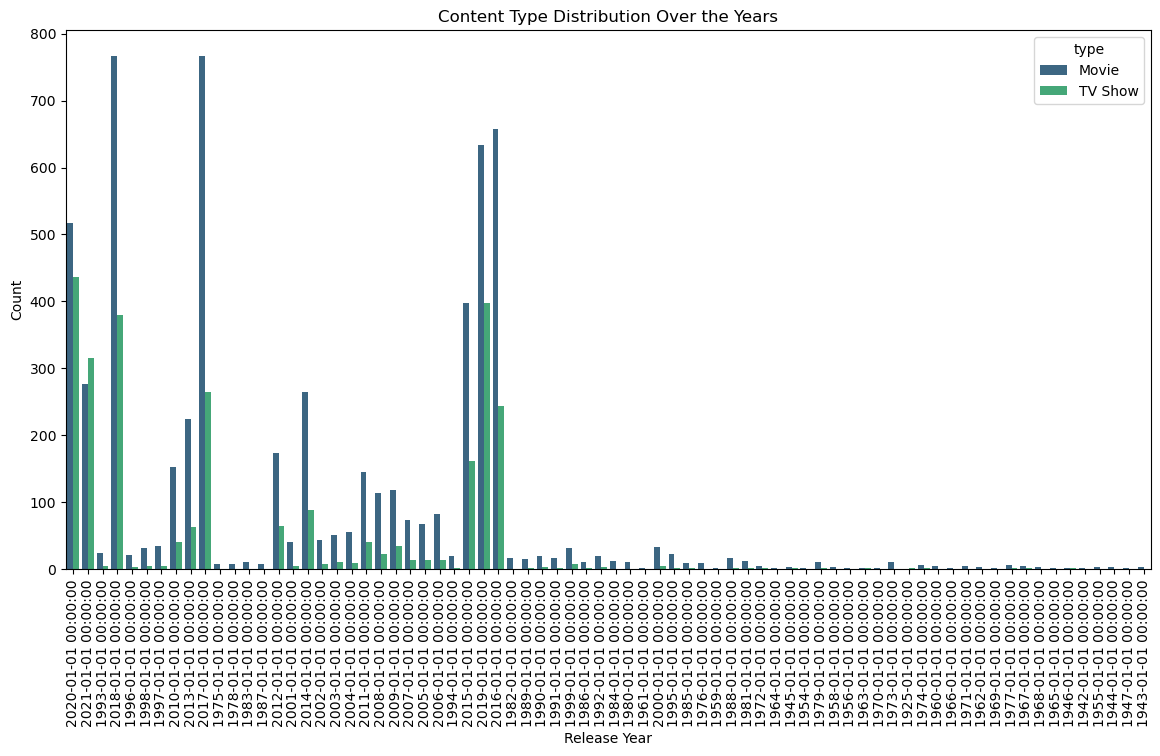

In [53]:
# Show the relationship between release year and content type
plt.figure(figsize=(14, 7))
sns.countplot(x='release_year', hue='type', data=data, palette='viridis', dodge=True)
plt.title('Content Type Distribution Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

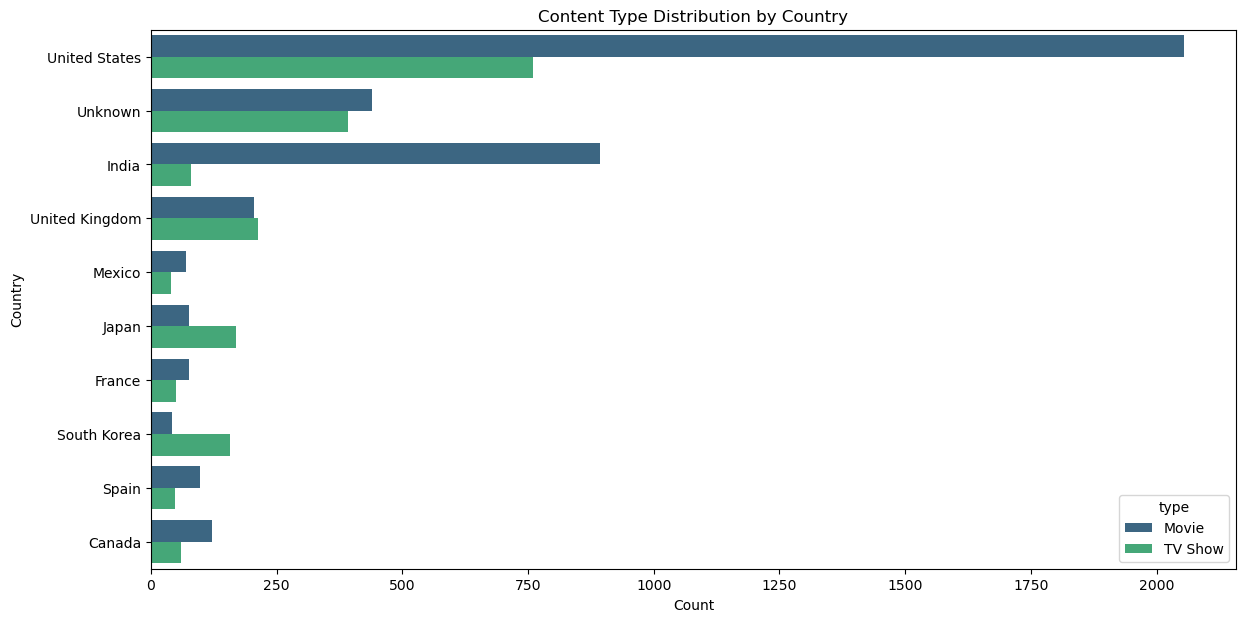

In [55]:
# Show the relationship between country and content type
top_countries_data = data[data['country'].isin(top_countries.index)]
plt.figure(figsize=(14, 7))
sns.countplot(y='country', hue='type', data=top_countries_data, palette='viridis', dodge=True)
plt.title('Content Type Distribution by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

Content-Based Filtering

In [58]:
# import libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [60]:
# Combine 'description' and 'listed_in' for a content-based approach
data['content'] = data['description'] + ' ' + data['listed_in']

In [62]:
# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['content'])

In [64]:
# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [67]:
# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = data[data['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    content_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[content_indices]

In [69]:
# Test the recommender system
print(get_recommendations('Blood & Water'))

108                Dive Club
4271              Lion Pride
4022             More to Say
222                Clickbait
4487    Accidentally in Love
6885             Gossip Girl
8574        ThirTEEN Terrors
684                    Elite
5324              20 Minutes
686        Hospital Playlist
Name: title, dtype: object


In [72]:
# Test the recommender system
print(get_recommendations('Ganglands'))

3976              The Eagle of El-Se'eed
5305                              Narcos
3552                     The Good Bandit
7463                       Miss Dynamite
1349    Pablo Escobar, el patrón del mal
4750                            El Chapo
6652                  Dueños del paraíso
6741                       Fatal Destiny
2894                            Puerta 7
8147                               Taken
Name: title, dtype: object


In [74]:
# Test the recommender system
print(get_recommendations('My Little Pony: A New Generation'))

4364    My Little Pony Friendship Is Magic: Best Gift ...
5237             Equestria Girls: Tales of Canterlot High
7110                      Jack and the Cuckoo-Clock Heart
4588                                      My Friend Pinto
1778                                 Kongsuni and Friends
525                   My Little Pony: Friendship Is Magic
6466                                       Chicken Little
4590    My Little Pony Equestria Girls: Rollercoaster ...
555                                           Snowpiercer
8394                                   The Little Mermaid
Name: title, dtype: object


Advanced Recommendation System (Collaborative Filtering)

In [125]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [127]:
# Load the data for collaborative filtering
ratings_dict = {'itemID': data['show_id'], 'userID': np.random.randint(1, 1000, size=len(data)), 'rating': np.random.randint(1, 6, size=len(data))}
ratings_df = pd.DataFrame(ratings_dict)

In [129]:
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(ratings_df[['userID', 'itemID', 'rating']], reader)

In [131]:
# Use SVD algorithm for collaborative filtering
trainset, testset = train_test_split(ratings_df, test_size=0.25)
algo = SVD()
algo.fit(dataset.build_full_trainset())

In [133]:
# Evaluate the performance
cross_validate(algo, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4287  1.4217  1.4219  1.4245  1.4467  1.4287  0.0093  
MAE (testset)     1.2277  1.2245  1.2240  1.2355  1.2544  1.2332  0.0113  
Fit time          0.06    0.03    0.03    0.03    0.03    0.04    0.01    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([1.42870545, 1.42168561, 1.42189455, 1.42453113, 1.44670071]),
 'test_mae': array([1.22773785, 1.22453437, 1.22403035, 1.23545375, 1.25438169]),
 'fit_time': (0.05996203422546387,
  0.033454179763793945,
  0.03188204765319824,
  0.03186798095703125,
  0.03146219253540039),
 'test_time': (0.0022499561309814453,
  0.0017178058624267578,
  0.0018208026885986328,
  0.0017080307006835938,
  0.0016529560089111328)}

In [135]:
# Function to predict ratings for a given user and recommend top N movies
def recommend_top_n(user_id, n=10):
    user_ratings = ratings_df[ratings_df['userID'] == user_id]
    unseen_items = data[~data['show_id'].isin(user_ratings['itemID'])]
    predictions = [algo.predict(user_id, item_id).est for item_id in unseen_items['show_id']]
    recommended_indices = np.argsort(predictions)[-n:]
    return unseen_items.iloc[recommended_indices]['title']

In [137]:
# Test the advanced recommender system
print(recommend_top_n(1, 10))

4678                 Undercover Law
5123                   Pottersville
5780          Welcome Mr. President
741             Blind Intersections
5062    Sebastián Marcelo Wainraich
2138                      Christine
4202                   Horrid Henry
2425           The Light of My Eyes
2874                 Altered Carbon
3384       Revenge of the Pontianak
Name: title, dtype: object
